In [2]:
from astropy.io import fits
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

Change this to the location of your files:

In [3]:
%cd '/home/soja5284/Documents/MAVEN/IUVS/Data/CSS/level1b/' # location of the folder 

/home/soja5284/Documents/MAVEN/IUVS/Data/CSS/level1b


In [4]:
l1bfilenames=!ls ./

In [5]:
l1bfilenames

['mvn_iuv_l1b_periapse-orbit00114-muv_20141019T152350_v03_r01.fits.gz']

In [6]:
!pwd /

/home/soja5284/Documents/MAVEN/IUVS/Data/CSS/level1b


In [7]:
l1b=fits.open(l1bfilenames[0])

In [8]:
extnames=[ext.header['EXTNAME'] for ext in l1b[2:]];
extnames

['Random_phy_unc',
 'Systematic_phy_unc',
 'detector_raw',
 'detector_dark_subtracted',
 'quality_flag',
 'background_dark',
 'Dark_Integration',
 'Dark_Engineering',
 'Dark_Observation',
 'detector_dark',
 'Integration',
 'Engineering',
 'Binning',
 'SpacecraftGeometry',
 'PixelGeometry',
 'Observation']

In [9]:
l1b['Integration'].data[0]['UTC']

'2014/292 Oct 19 15:23:50.08241UTC'

In [10]:
inttime=l1b['Integration'].data[0]['UTC'][0:-4]
inttime[0:4]+inttime[8:]

'2014 Oct 19 15:23:50.0824'

In [11]:
time.strptime(l1b['Integration'].data[0]['UTC'],"%Y/%j %b %d %H:%M:%S.%f%Z")

time.struct_time(tm_year=2014, tm_mon=10, tm_mday=19, tm_hour=15, tm_min=23, tm_sec=50, tm_wday=6, tm_yday=292, tm_isdst=0)

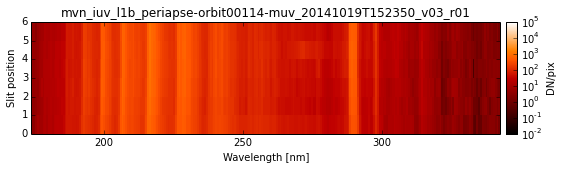

In [14]:
waves=l1b[-1].data[0]['WAVELENGTH'][0]
slitpos = range(0,7)

X,Y=np.meshgrid(waves,slitpos)
ext='detector_dark_subtracted'
prodid=l1b[-1].data[0]['PRODUCT_ID']
orbno=l1b[-1].data[0]['ORBIT_NUMBER']
filetime=l1b[-1].data[0]['PRODUCT_ID'].split("_")[5]
stringtime=time.strftime("%d %b %H:%M:%S",\
                         time.strptime(l1b['Integration'].data[0]['UTC'],\
                                       "%Y/%j %b %d %H:%M:%S.%f%Z"))
intno=4

title=prodid

spawidth=l1b['Binning'].data[0]['SPABINWIDTH'][1]
spewidth=l1b['Binning'].data[0]['SPEBINWIDTH'][1]
npix=spawidth*spewidth

Z=l1b[ext].data[intno]/npix

fig, ax=plt.subplots(figsize=(10,2));
im = plt.pcolor(X,Y,Z, cmap='gist_heat', norm=LogNorm(vmin=0.01,vmax=1e5));
plt.axis([X.min(), X.max(), Y.min(), Y.max()]);
plt.xlabel("Wavelength [nm]");
plt.ylabel("Slit position");
plt.title(title);
ax.set_aspect("auto");
#ax.set_aspect(7)
cb=plt.colorbar(im,pad=0.01,aspect=10,label="DN/pix");

imgfname='/home/soja5284/Desktop/'+ \
          prodid+".png";

plt.savefig(imgfname,dpi=300,bbox_inches='tight');
